# Inferential Statistics Ib - Frequentism

## Completed by Chantel Clark

## Learning objectives

Welcome to the second Frequentist inference mini-project! Over the course of working on this mini-project and the previous frequentist mini-project, you'll learn the fundamental concepts associated with frequentist inference. The following list includes the topics you will become familiar with as you work through these two mini-projects:
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate confidence intervals and p-values
* how those confidence intervals and p-values allow you to perform hypothesis (or A/B) tests

## Prerequisites

* what a random variable is
* what a probability density function (pdf) is
* what the cumulative density function is
* a high-level sense of what the Normal distribution

If these concepts are new to you, please take a few moments to Google these topics in order to get a sense of what they are and how you might use them.

These two notebooks were designed to bridge the gap between having a basic understanding of probability and random variables and being able to apply these concepts in Python. This second frequentist inference mini-project focuses on a real-world application of this type of inference to give you further practice using these concepts. 

In the previous notebook, we used only data from a known normal distribution. You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.

## Hospital medical charges

Imagine that a hospital has hired you as their data analyst. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. This mini-project, as well as the bootstrap and Bayesian inference mini-projects also found in this unit are designed to illustrate how each of the inferential statistics methods have their uses for different use cases. In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?
Answering that last question with a frequentist approach makes some assumptions, or requires some knowledge, about the two groups. In the next mini-project, you'll use bootstrapping to test that assumption. And in the final mini-project of the unit, you're going to create a model for simulating _individual_ charges (not a sampling distribution) that the hospital can use to model a range of scenarios.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). For the purposes of this exercise, assume the observations are the result of random sampling from our one hospital. Recall in the previous assignment, we introduced the Central Limit Theorem (CLT), and how it tells us that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data. Remember, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import t
from scipy.stats import ttest_ind_from_stats
from numpy.random import seed
medical = pd.read_csv('data/insurance2.csv')

In [48]:
medical.shape

(1338, 8)

In [49]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__ There is a long right tail for this data, so the mean charge is going to be greater than the median because the mean will increase due to the larger values. The standard deviation is also going to be large because the data does not look normally distributed.

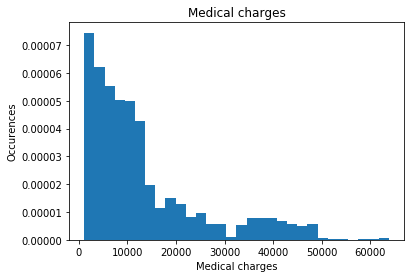

In [50]:
_=plt.hist(medical.charges, bins=30, normed=True)
_=plt.xlabel('Medical charges')
_=plt.ylabel('Occurences')
_=plt.title('Medical charges')

In [51]:
sample_mean = round(np.mean(medical.charges),2)
sample_sd = round(np.std(medical.charges),2)

print('The mean medical charge is $', sample_mean)
print('The standard deviation of medical charges is $', sample_sd)


The mean medical charge is $ 13270.42
The standard deviation of medical charges is $ 12105.48


__Q:__ The administrator is concerned that the actual average charge has fallen below 12000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__  We have 1338 entries to analyze but the distribution is skewed. We could either log transform the data kand perform a t-test or use bootstrapping to resample and estimate the uncertainty of the mean.

__Q:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A one-sided or two-sided interval? Calculate the critical value and the relevant 95% confidence interval for the mean and comment on whether the administrator should be concerned?

__A:__  A one-sided interval because the administrator is concerned that the mean medical charge is below $12000.  

Null hypothesis: The mean medical charge is greater than or equal to $12000.  

Alternative hypothesis: The mean medical charge is less than $12000. 

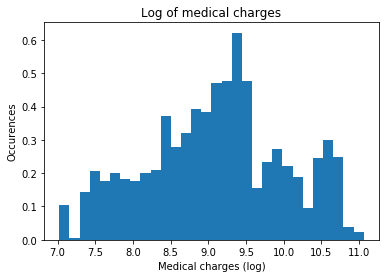

In [52]:
# Take the log of the charges, since the medical charges are exponentially distributed
log_charges = np.log(medical.charges)

_=plt.hist(log_charges, bins=30, normed=True)
_=plt.xlabel('Medical charges (log)')
_=plt.ylabel('Occurences')
_=plt.title('Log of medical charges')


In [53]:
# Get the t-statistic
n = len(log_charges)
tstat = t.ppf(0.05, df= n-1)
tstat

-1.6459941145571324

In [54]:
SE = np.std(log_charges) / np.sqrt(n) # standard error
MOE = tstat * SE # margin of error
lbound = np.mean(log_charges) + MOE

print('The log of the mean medical charge is ', np.mean(log_charges))
print('The standard error is', SE)
print('The margin of error is', MOE)
print('The lower bound of the 95% confidence interval is ', lbound)

The log of the mean medical charge is  9.098658729424768
The standard error is 0.025128937689890322
The margin of error is -0.04136208354263237
The lower bound of the 95% confidence interval is  9.057296645882136


In [55]:
# We want to know how likely it is that the mean medical charge is less than $12000
print('The log of 12000 is', np.log(12000))

The log of 12000 is 9.392661928770137


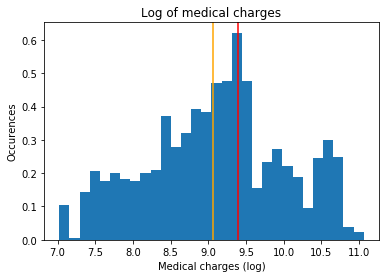

In [56]:
_=plt.hist(log_charges, bins=30, normed=True)
_=plt.xlabel('Medical charges (log)')
_=plt.ylabel('Occurences')
_=plt.title('Log of medical charges')
_=plt.axvline(lbound, color='orange') # lower bound of the 95% confidence interval
_=plt.axvline(np.log(12000), color='red') 

You can see that in the histogram above the lower bound of the 95% confidence level (in orange). The log of \$12000 is within the confidence interval, so we fail to reject the null hypothesis and can conclude that the mean medical charge is greater than $12000.

In [57]:
### Use bootstrapping of the mean to find the 95% CI since data is not normally distributed

bootstrap = pd.DataFrame({'meancharge': [medical.sample(1000,replace=True).charges.mean() for i in range(1000)]})
bootstrap.head()

,meancharge
0,13024.191350
1,13450.005424
2,13566.682736
3,13094.476938
4,13604.392629


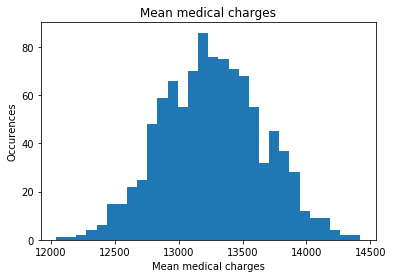

In [58]:
_=plt.hist(bootstrap.meancharge, bins=30)
_=plt.xlabel('Mean medical charges')
_=plt.ylabel('Occurences')
_=plt.title('Mean medical charges')

In [59]:
# Test statistic (z-score)
zstat = norm.ppf(0.05)
zstat

-1.6448536269514729

In [60]:

# Critical value from 1 tail table
# z = -1.645
bs_mean = np.mean(bootstrap.meancharge)
bs_std = np.std(bootstrap.meancharge)

MOE = zstat * (bs_std / np.sqrt(1338))
print('The margin of error is ', MOE)
print('The upper limit of the 95% confidence interval is $', bs_mean + MOE)

The margin of error is  -17.74838990734696
The upper limit of the 95% confidence interval is $ 13246.027869990412


The 95% confidence interval shows that the mean charge is likely to be above $12000.

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means where the pooled standard deviation of the two groups is given by
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t* test statistic is then given by

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

What assumption about the variances of the two groups are we making here?

__A:__ Null hypothesis: people with insurance are charged the same amount as people without insurance.  

Alternative hypothesis: people with insurance are charged a different amount as people without insurance.

We are assuming that the variances for the two groups (insured and non-insured) are the same.

__Q:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__

In [61]:
medical.head(10)

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1
5,31,0,25.740,0,0,2,3756.62160,0
6,46,0,33.440,1,0,2,8240.58960,1
7,37,0,27.740,3,0,1,7281.50560,0
8,37,1,29.830,2,0,0,6406.41070,0
9,60,0,25.840,0,0,1,28923.13692,0


In [62]:
# Create a data frame of all medical charges for people with insurance
insured = medical[medical['insuranceclaim'] == 1].charges
n1 = len(insured) # number of claims with insurance
m1 = np.mean(insured) # mean
sd1 = np.std(insured) # standard deviation
print('The mean medical charge for people with insurance is $', round(m1,2))

The mean medical charge for people with insurance is $ 16423.93


In [63]:
# Create a data frame of all medical charges for people without insurance
n_insured = medical[medical['insuranceclaim'] == 0].charges
n0 = len(n_insured) #number of charges without insurance
m0 = np.mean(n_insured)
sd0 = np.std(n_insured)
print('The mean medical charge for people without insurance is $', round(m0,2))

The mean medical charge for people without insurance is $ 8821.42


In [64]:
print('The total number of charges to people with insurance is', n1)
print('The total number of charges to people without insurance is', n0)

The total number of charges to people with insurance is 783
The total number of charges to people without insurance is 555


In [65]:
sd_p = np.sqrt(((n0-1) * sd0 ** 2 + (n1-1) * sd1 ** 2)/(n0 + n1 - 2))
print('The pooled standard deviation is', sd_p)

The pooled standard deviation is 11512.282899205744


In [66]:
# T-statistic
tstat = (m0 - m1)/(sd_p * np.sqrt(1/n0 + 1/n1))
tstat

-11.901306943555385

In [67]:
# Probability of t-statistic: pval
pval = t.cdf(-11.901306943555385, df=n0+n1-2) * 2
pval

4.090550214373795e-31

In [68]:
# from scipy.stats import ttest_ind_from_stats

ttest_ind_from_stats(m0, sd0, n0, m1, sd1, n1)

Ttest_indResult(statistic=-11.901306943555387, pvalue=4.090550214373679e-31)

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do pass your data to it.

__Q:__ In the above calculations, we assumed the sample variances were equal. We may well suspect they are not (we'll explore this in another assignment). The calculation becomes a little more complicated to do by hand in this case, but we now know of a helpful function. Check the documentation for the function to tell it not to assume equal variances and perform the test again.

__A:__

In [69]:
ttest_ind_from_stats(m0, sd0, n0, m1, sd1, n1, equal_var=False)

Ttest_indResult(statistic=-13.307332624349796, pvalue=9.974516564429595e-38)

__Q:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__  The scipy.stats.zscore method will take in an array, and output the z-score for each number in the array based off of the sample mean and standard deviation. This is different from the ttest_ind_from_stats method, which takes input arguments of the sample mean, sample standard deviation, and sample size.

In [70]:
# from scipy.stats import zscore

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test